In [1]:
from scipy.integrate import odeint 
import matplotlib.pyplot as plt
import numpy as np 

from sympy import symbols, Eq, solve




import numpy as np 

erg_to_eV  = 6.24150913e11
k_B        = 8.617333262145e-5
Mpc        = 3.08567758e19

H_0        = 67/(Mpc)
h          = 0.67
h_planck   = 4.135667662e-15
u          = 1.66053906660e-24
m_e        = 9.10938356e-28
e          = 4.80320425e-10
m_p        = 1.007276466879*u
m_H        = 1.00784*u
c          = 29979245800
B1         = 13.6
B2         = B1/2**2
gamma_2s   = 8.22458

#omega_M_h2 = np.array([0.075,0.15,0.3])
#omega_B_h2 = np.array([0.01,0.02,0.04])

hh = 0.67
omega_B_h2 = 0.02
omega_M_h2 = 0.15 

omega_R = 4.16e-5 / (hh**2)
omega_M = omega_M_h2 / (hh**2)
omega_B = omega_B_h2 / (hh**2)


omega_R    = 4.16e-5
n_b0       = 1.123e-5*omega_B_h2
T_CMB      = 2.725
lambda_a   = 1215.682e-8

T0  = 4226
z0  = 1550

def n(T):
    return 0.76*n_b0*(T/T_CMB)**3

def alpha(T):
    return 1.4377e-10*T**(-0.6166)/(1+5.085e-10*T**(0.53))

def beta(T):
     return alpha(T)*(2*np.pi*m_e*erg_to_eV*(k_B*T)/h_planck**2)**(3/2)*np.exp(-B2/(k_B*T))

def S(T):
    return n(T)*(2*np.pi*m_e*erg_to_eV*(k_B*T)/(h_planck**2))**(-3/2)*np.exp(B1/(k_B*T))

def H(T):
    return H_0*np.sqrt(omega_M_h2/h**2*(T/T_CMB)**3 + omega_R*(T/T_CMB)**4)

def g(X, T):
    return alpha(T)*n(T)/(T*H(T))*(1+beta(T)/(gamma_2s+8*np.pi*H(T)/(lambda_a**3.*n(T)*(1-X))))**(-1)

def dXdT(X, T):
    return g(X,T)*(X**2 - (1-X)/S(T))


# In[3]:


from scipy.integrate import odeint 
import matplotlib.pyplot as plt
import numpy as np 

from sympy import symbols, Eq, solve


T = np.linspace(T_CMB, 4226, 10000)
T0 = 4226
X0 = 1

X = odeint(dXdT, X0, T)


# In[27]:


T = np.linspace( 4226, T_CMB , 10000)
T0 = 4226
X0 = 1

a=symbols('a')
Xeq0 = solve(a*(1+S(T0)*a)-1);
Xeq0 = Xeq0[1]


#Euler's method

X    = np.append([Xeq0], np.zeros(len(T)-1))
Xeq  = np.append([Xeq0], np.zeros(len(T)-1))

delT = T[2]-T[1]

print(Xeq)

for ii in range (len(T)-1) :
    
    X[ii+1] = X[ii]+delT*dXdT(X[ii], T[ii])
   
    temp = solve(a*(1+S(T[ii])*a)-1)
    Xeq[ii] = temp[-1]
    
#    if find(ii == T_comp)
#        disp([T(ii) X(ii) Xeq(ii)])

        

#ax=plt.subplot(111)
#ax.plot(T,X)
#ax.set_xlabel('T')
#ax.set_ylabel('X')
#ax.set_ylim(0,)

plt.show()


# In[73]:


import scipy
from scipy.interpolate import interp1d


ax=plt.subplot(111)
ax.plot(T,X,'b',T,Xeq,'g--')
ax.set_xlabel('T')
ax.set_ylabel('X and Xeq')
#ax.set_yscale('log')
ax.set_ylim(0,1.01)
plt.show()

X_interp = scipy.interpolate.interp1d(T, X)

print(X_interp(4000))
print(X_interp(3400))
print(X_interp(2800))

error = (X_interp(4000) - 0.9245)/0.9245

print(error*100)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in true_divide
/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[0.984598761266081 0.0 0.0 ... 0.0 0.0 0.0]


<Figure size 640x480 with 1 Axes>

0.9250708771119774
0.44138712032646404
0.06840467321642436
0.06174982282070876


# Part 1

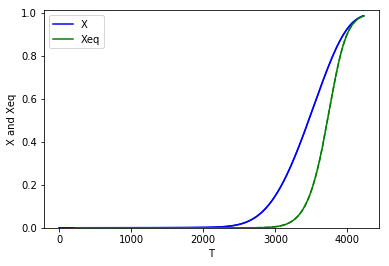

The residual X when z=10 (when T = 29.975) is : 0.00022516111710768852 , (or 2.25e-4)


In [26]:
import pylab

ax=plt.subplot(111)
ax.plot(T,X,'b',T,Xeq,'g--')
ax.set_xlabel('T')
ax.set_ylabel('X and Xeq')
#ax.set_yscale('log')
ax.set_ylim(0,1.01)


X_interp = scipy.interpolate.interp1d(T, X)
Xeq_interp = scipy.interpolate.interp1d(T, Xeq)


pylab.plot(T, X, 'b', label='X')
pylab.plot(T, Xeq, '-g', label='Xeq')
pylab.legend(loc='upper left')

plt.show()



print('The residual X when z=10 (when T = 29.975) is :', X_interp(29.975), ', (or 2.25e-4)')


# Part 2

The minimum of the function is: 13700.995080195671  >> 1 , so the approximation is justified


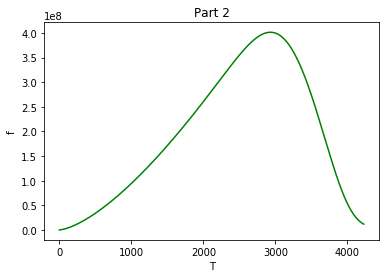

In [27]:
import scipy
from scipy.interpolate import interp1d

gam2p = 4.699e8 

def f(T):
    return (3* gam2p * (lambda_a)**3 * (1-X_interp(T)) * n(T))/(8 * np.pi * H(T)) 

f_interp = scipy.interpolate.interp1d(T, f(T))

ax=plt.subplot(111)
ax.plot(T,f_interp(T),'g')
ax.set_xlabel('T')
ax.set_ylabel('f')
ax.set_title('Part 2')


print('The minimum of the function is:',min(f(T)), ' >> 1 , so the approximation is justified')

# Part 3

In [32]:
sigT = (8*np.pi/3) * (e**2 / (m_e * c**2))**2

def dtaudT(T):
    return (c * sigT * X(T) * n(T)) / (T * H(T)) 

def tau(T):
    